# Brian2GeNN

Start with installing the needed packages


In [2]:
print("This will take around 1 minute")
!pip install brian2
!pip install brian2genn

  Created wheel for brian2: filename=Brian2-2.4.2-cp38-cp38-win_amd64.whl size=950622 sha256=48910be1f96d3edf45bfff7c31d092135fadc985624bb485f35656fef3584817
  Stored in directory: c:\users\01joja\appdata\local\pip\cache\wheels\21\9a\1d\578d6446473c442ddb7631a98d567e363d3f9d394b055956da
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-py3-none-any.whl size=20074 sha256=fef9458a8b67b746f192bbf24e49b9be991c6bd87564999953194f1d80f2491a
  Stored in directory: c:\users\01joja\appdata\local\pip\cache\wheels\b4\99\9f\8eb77fdf759c1380719071722f2c37dd0fa1f6aa477c51cb6c
Successfully built brian2 py-cpuinfo


You will then need to import the libraries.  

In [2]:
from brian2 import *
import brian2genn
%matplotlib inline

## Going thure the Toturial

[Toturial Brian2](https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html)

First some simple notations.

In [3]:


print(20*volt)
print(1000*amp)
print(1e6*volt)
print(1000*namp)
print(10*nA*5*Mohm)



20. V
1. kA
1. MV
1. uA
50. mV


## A simple model (See Toturial link)

In [5]:
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

#A neuron group
G = NeuronGroup(1, eqs)


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


In [71]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

INFO       No numerical integration method specified for group 'neurongroup_4', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]


Before v = 0.0
After v = 0.9999546000702376


In [55]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))


Expected value of v = 0.9999546000702375


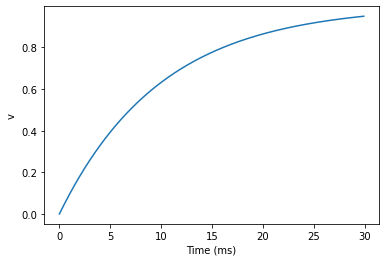

In [65]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

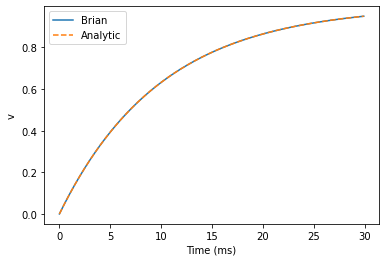

In [66]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend();

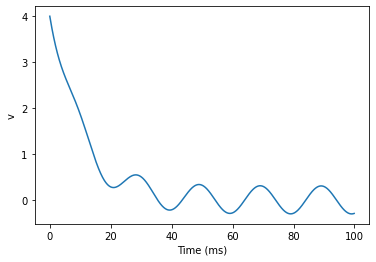

In [85]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(1*pi*100*Hz*t)-v)/tau : 1
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = 4 # initial value

run(100*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

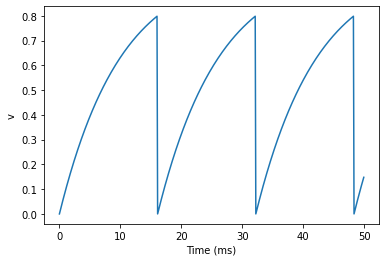

In [92]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [91]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


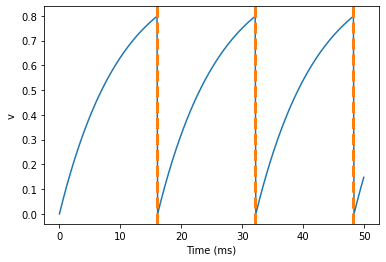

In [93]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

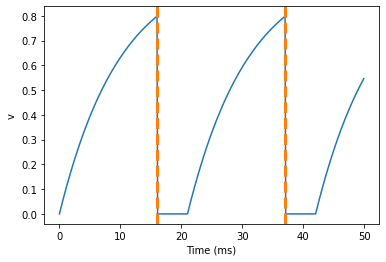

In [96]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');